# Facebook Recruiting IV: Human or Robot?

# Upload datasets and Import Libraries

In [61]:
import plotly.express as px
import numpy as np
import pandas as pd
import statistics


# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
bids = pd.read_csv('data/bids.csv') 

# Testing out data

In [3]:
print(train.shape)
print(test.shape)
print(bids.shape)

(2013, 4)
(4700, 3)
(7656334, 9)


In [4]:
train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [5]:
test.head()

,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


In [6]:
bids.head(40)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,9759243157894736,ru,91.107.221.27,vasstdc27m7nks3
6,6,eef4c687daf977f64fc1d08675c44444raj3s,kjlzx,mobile,phone2,9759243210526315,th,152.235.155.159,j9nl1xmo6fqhcc6
7,7,ab056855c9ca9d36390feae1fa485883issyg,f5f6k,home goods,phone8,9759243210526315,id,3.210.112.183,hnt6hu93a3z1cpc
8,8,d600dc03b11e7d782e1e4dae091b084a1h5ch,h7jjx,home goods,phone9,9759243210526315,th,103.64.157.225,vasstdc27m7nks3
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,9759243210526315,za,123.28.123.226,vasstdc27m7nks3


In [7]:
bids.nunique()

bid_id         7656334
bidder_id         6614
auction          15051
merchandise         10
device            7351
time            776529
country            199
ip             2303991
url            1786351
dtype: int64

In [8]:
train_bidder_id = train.bidder_id.unique()
test_bidder_id = test.bidder_id.unique()
bids_bidder_id = bids.bidder_id.unique()

print(len(train_bidder_id))
print(len(test_bidder_id))
print(len(bids_bidder_id))

2013
4700
6614


In [9]:
train_not_found = []
test_not_found = []

for bidder_id in train_bidder_id:
    if bidder_id not in bids_bidder_id:
        train_not_found.append(bidder_id)
        
for bidder_id in test_bidder_id:
    if bidder_id not in bids_bidder_id:
        test_not_found.append(bidder_id)
        
print(len(train_not_found))
print(len(test_not_found))

29
70


# Feature Engineering

### 1: No. of auctions/merchandise/device/time/country/IP/URL

In [10]:
# grouped bids df by bidder_id, applied nunique() to all features
bidder_unique = bids.groupby('bidder_id').nunique().drop(columns=['bidder_id']).reset_index()
bidder_unique = bidder_unique.drop(columns=['merchandise']).rename(columns={'auction': 'auction count', 
                                     'device': 'device count',
                                      'time': 'time count',
                                      'country': 'country count',
                                      'ip': 'ip count',
                                      'url': 'url count'
                                    })
bidder_unique 

,bidder_id,bid_id,auction count,device count,time count,country count,ip count,url count
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1
1,002d229ffb247009810828f648afc2ef593rb,2,1,2,2,1,1,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,3,3,1,3,2
4,00486a11dff552c4bd7696265724ff81yeo9v,20,13,8,20,1,10,7
...,...,...,...,...,...,...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,25075,637,792,23487,102,18726,8039
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,22,15,13,22,6,18,12
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1,1,1,1,1,1,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,664,55,96,664,1,37,144


In [11]:
train_set = train.merge(bidder_unique, on='bidder_id', how='left')
test_set = test.merge(bidder_unique, on='bidder_id', how='left')

### 2: No. of bids

In [12]:
# grouped bids df by bidder_id, counted no. of rows
bidder_counts = bids.groupby("bidder_id")['time'].count().reset_index()
bidder_counts = bidder_counts.rename(columns={'time':'num_bids'})
bidder_counts

,bidder_id,num_bids
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,2
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3
4,00486a11dff552c4bd7696265724ff81yeo9v,20
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,25075
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,22
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,664


In [13]:
train_set = train_set.merge(bidder_counts, on='bidder_id', how='left')
test_set = test_set.merge(bidder_counts, on='bidder_id', how='left')

### 3: Individual merchandise count

In [14]:
# extracted bidder_id and merchandise col from bids
merchandise_per_bidder = bids[['bidder_id', 'merchandise']]
merchandise_per_bidder

,bidder_id,merchandise
0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,jewelry
1,668d393e858e8126275433046bbd35c6tywop,furniture
2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,home goods
3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jewelry
4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jewelry
...,...,...
7656329,626159dd6f2228ede002d9f9340f75b7puk8d,jewelry
7656330,a318ea333ceee1ba39a494476386136a826dv,mobile
7656331,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,sporting goods
7656332,d4bd412590f5106b9d887a43c51b254eldo4f,jewelry


In [15]:
# one-hot encoded merchandise column
mpd_OH_encoding = pd.get_dummies(merchandise_per_bidder['merchandise'])
mpd_concat_df = pd.concat([merchandise_per_bidder, mpd_OH_encoding], axis=1)

In [16]:
# grouped by bidder_id and summed it
# no of bids a bidder placed in each merchandise category
mpd_count_concat_df = mpd_concat_df.groupby('bidder_id').sum()
mpd_count_concat_df

,auto parts,books and music,clothing,computers,furniture,home goods,jewelry,mobile,office equipment,sporting goods
bidder_id,,,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
002d229ffb247009810828f648afc2ef593rb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
0030a2dd87ad2733e0873062e4f83954mkj86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
00486a11dff552c4bd7696265724ff81yeo9v,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
ffbc0fdfbf19a8a9116b68714138f2902cc13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25075.0,0.0,0.0
ffc4e2dd2cc08249f299cab46ecbfacfobmr3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0
ffd29eb307a4c54610dd2d3d212bf3bagmmpl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
train_set2 = train_set.merge(mpd_count_concat_df, on='bidder_id', how='left')
test_set2 = test_set.merge(mpd_count_concat_df, on='bidder_id', how='left')

In [18]:
# test set 2 doesn't have autoparts merch category
test_set2['auto parts'] = 0

### 4: Maximum bids per instant

In [19]:
# grouped bids df by bidder_id and time - df of all the instantaneous bids
instantaneous_bids = bids.groupby(['bidder_id', 'time']).size().reset_index(name='bids per instant')
instantaneous_bids

,bidder_id,time,bids per instant
0,001068c415025a009fee375a12cff4fcnht8y,9706345052631578,1
1,002d229ffb247009810828f648afc2ef593rb,9766744105263157,1
2,002d229ffb247009810828f648afc2ef593rb,9766744210526315,1
3,0030a2dd87ad2733e0873062e4f83954mkj86,9704553947368421,1
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,9640018631578947,1
...,...,...,...
6843513,ffd62646d600b759a985d45918bd6f0431vmz,9772802947368421,1
6843514,ffd62646d600b759a985d45918bd6f0431vmz,9772811421052631,1
6843515,ffd62646d600b759a985d45918bd6f0431vmz,9772850052631578,1
6843516,ffd62646d600b759a985d45918bd6f0431vmz,9772881631578947,1


In [20]:
# bids placed per instance for every bidder
grouped_df = instantaneous_bids.groupby("bidder_id")

# maximum instantaneous bids for every bidder
maximum_instantaneous_bids_df = grouped_df.max()
maximum_instantaneous_bids_df = maximum_instantaneous_bids_df.reset_index()

In [21]:
maximum_instantaneous_bids_df = maximum_instantaneous_bids_df.drop(columns=['time'])
maximum_instantaneous_bids_df

,bidder_id,bids per instant
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
4,00486a11dff552c4bd7696265724ff81yeo9v,1
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,5
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,1


In [22]:
train_set2 = train_set2.merge(maximum_instantaneous_bids_df, on='bidder_id', how='left')
test_set2 = test_set2.merge(maximum_instantaneous_bids_df, on='bidder_id', how='left')

### 5: Max bids per auction

In [23]:
# bids per auction
bids2 = bids.groupby(['bidder_id', 'auction']).merchandise.count().reset_index()
bids_in_an_auction = bids2.rename(columns={'merchandise':'bids in an auction'})
bids_in_an_auction

,bidder_id,auction,bids in an auction
0,001068c415025a009fee375a12cff4fcnht8y,4ifac,1
1,002d229ffb247009810828f648afc2ef593rb,2tdw2,2
2,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,1
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,1
...,...,...,...
382336,ffd62646d600b759a985d45918bd6f0431vmz,wthc6,1
382337,ffd62646d600b759a985d45918bd6f0431vmz,yfjur,7
382338,ffd62646d600b759a985d45918bd6f0431vmz,yv5hw,5
382339,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,5


In [24]:
max_bid_per_auction = bids_in_an_auction.groupby('bidder_id')['bids in an auction'].max().reset_index()
max_bid_per_auction

,bidder_id,bids in an auction
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,2
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
4,00486a11dff552c4bd7696265724ff81yeo9v,3
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,3682
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,4
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,78


### 6: Maximum Simultaneous Auctions/Devices/Countries

In [25]:
# simultaneous auctions
# no of auctions occuring for a bidder at every instance of time
simul_auction = bids.groupby(['bidder_id', 'time'])['auction'].nunique().reset_index()
simul_auction

,bidder_id,time,auction
0,001068c415025a009fee375a12cff4fcnht8y,9706345052631578,1
1,002d229ffb247009810828f648afc2ef593rb,9766744105263157,1
2,002d229ffb247009810828f648afc2ef593rb,9766744210526315,1
3,0030a2dd87ad2733e0873062e4f83954mkj86,9704553947368421,1
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,9640018631578947,1
...,...,...,...
6843513,ffd62646d600b759a985d45918bd6f0431vmz,9772802947368421,1
6843514,ffd62646d600b759a985d45918bd6f0431vmz,9772811421052631,1
6843515,ffd62646d600b759a985d45918bd6f0431vmz,9772850052631578,1
6843516,ffd62646d600b759a985d45918bd6f0431vmz,9772881631578947,1


In [26]:
# get maximum value
simul_auction = simul_auction.rename(columns={'auction':'simultaneous auctions'})
max_simul_auction = simul_auction.groupby('bidder_id')['simultaneous auctions'].max().reset_index()
max_simul_auction

,bidder_id,simultaneous auctions
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
4,00486a11dff552c4bd7696265724ff81yeo9v,1
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,4
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,1


In [27]:
# simultaneous devices
simul_device = bids.groupby(['bidder_id', 'time'])['device'].nunique().reset_index()
simul_device = simul_device.rename(columns={'device':'simultaneous devices'})
max_simul_device = simul_device.groupby('bidder_id')['simultaneous devices'].max().reset_index()
max_simul_device

,bidder_id,simultaneous devices
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
4,00486a11dff552c4bd7696265724ff81yeo9v,1
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,5
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,1


In [28]:
# simultaneous countries
simul_country = bids.groupby(['bidder_id', 'time'])['country'].nunique().reset_index()
simul_country = simul_country.rename(columns={'country':'simultaneous countries'})
max_simul_country = simul_country.groupby('bidder_id')['simultaneous countries'].max().reset_index()
max_simul_country

,bidder_id,simultaneous countries
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
4,00486a11dff552c4bd7696265724ff81yeo9v,1
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,3
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,1
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1
6612,ffd62646d600b759a985d45918bd6f0431vmz,1


In [29]:
train_set2 = train_set2.merge(max_simul_country, on='bidder_id', how='left')
test_set2 = test_set2.merge(max_simul_country, on='bidder_id', how='left')

train_set2 = train_set2.merge(max_simul_device, on='bidder_id', how='left')
test_set2 = test_set2.merge(max_simul_device, on='bidder_id', how='left')

train_set2 = train_set2.merge(max_simul_auction, on='bidder_id', how='left')
test_set2 = test_set2.merge(max_simul_auction, on='bidder_id', how='left')

train_set2 = train_set2.merge(max_bid_per_auction, on='bidder_id', how='left')
test_set2 = test_set2.merge(max_bid_per_auction, on='bidder_id', how='left')

### 7: No. of Instantaneous Bids

Bids placed the instant when an auction started.

Start time of auction is taken as the earliest that a person bidded.

In [30]:
# start time of auction
auction_min_time = bids.groupby('auction').time.min().reset_index()
auction_min_time = auction_min_time.rename(columns={'time':'min auction response time'})
auction_min_time

,auction,min auction response time
0,00270,9699049894736842
1,008vv,9759369421052631
2,00cwr,9695641631578947
3,00do0,9759323842105263
4,00hjy,9759410368421052
...,...,...
15046,zznnc,9759595684210526
15047,zzoy7,9631994105263157
15048,zztha,9767388947368421
15049,zzzlx,9759264894736842


In [31]:
# earliest that a bidder started bidding for an auction
earliest_bidder_times = bids.groupby(['bidder_id', 'auction']).time.min().reset_index()
earliest_bidder_times

,bidder_id,auction,time
0,001068c415025a009fee375a12cff4fcnht8y,4ifac,9706345052631578
1,002d229ffb247009810828f648afc2ef593rb,2tdw2,9766744105263157
2,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,9704553947368421
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,9700605052631578
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,9705974315789473
...,...,...,...
382336,ffd62646d600b759a985d45918bd6f0431vmz,wthc6,9765413157894736
382337,ffd62646d600b759a985d45918bd6f0431vmz,yfjur,9761803894736842
382338,ffd62646d600b759a985d45918bd6f0431vmz,yv5hw,9761075368421052
382339,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,9759382578947368


In [32]:
merged_time_df = earliest_bidder_times.merge(auction_min_time, on='auction', how='left')
merged_time_df

,bidder_id,auction,time,min auction response time
0,001068c415025a009fee375a12cff4fcnht8y,4ifac,9706345052631578,9631954473684210
1,002d229ffb247009810828f648afc2ef593rb,2tdw2,9766744105263157,9766598631578947
2,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,9704553947368421,9631917052631578
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,9700605052631578,9695609789473684
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,9705974315789473,9698507526315789
...,...,...,...,...
382336,ffd62646d600b759a985d45918bd6f0431vmz,wthc6,9765413157894736,9759789315789473
382337,ffd62646d600b759a985d45918bd6f0431vmz,yfjur,9761803894736842,9760490421052631
382338,ffd62646d600b759a985d45918bd6f0431vmz,yv5hw,9761075368421052,9759274052631578
382339,ffd62646d600b759a985d45918bd6f0431vmz,zz4dz,9759382578947368,9759296263157894


In [33]:
# bidders who placed the earliest bids/placed bids at 'start time' of auction
fastest_bidders = merged_time_df[merged_time_df['time'] == merged_time_df['min auction response time']]
fastest_bidders

,bidder_id,auction,time,min auction response time
49,0053b78cde37c4384a20d2da9aa4272aym4pb,28448,9632683368421052,9632683368421052
107,0053b78cde37c4384a20d2da9aa4272aym4pb,882qm,9707753157894736,9707753157894736
343,0053b78cde37c4384a20d2da9aa4272aym4pb,rwoqu,9696860052631578,9696860052631578
406,0053b78cde37c4384a20d2da9aa4272aym4pb,xwq8k,9695611684210526,9695611684210526
552,00a79ebd15f0b24a0a3b5794457cd8ed7dng1,32aid,9632653894736842,9632653894736842
...,...,...,...,...
382096,ffbc0fdfbf19a8a9116b68714138f2902cc13,qkzcn,9763493736842105,9763493736842105
382158,ffbc0fdfbf19a8a9116b68714138f2902cc13,tuhay,9759243315789473,9759243315789473
382257,ffbc0fdfbf19a8a9116b68714138f2902cc13,z9whw,9759339263157894,9759339263157894
382330,ffd62646d600b759a985d45918bd6f0431vmz,tq6eu,9759381315789473,9759381315789473


In [34]:
# no. of times they were the first person to bid in an auction
no_of_first_bids = fastest_bidders.groupby('bidder_id').auction.count().reset_index()
no_of_first_bids.sort_values(by='auction', ascending=False)

,bidder_id,auction
229,29c103503e1d6ace5626fb07a5ab0dafrtjvs,563
1204,cffb5f3c1f4ca815d0f643fcb2f2f316beod4,511
576,6713e820273f591bdff7d26a48ee30c5k4iii,510
1421,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,323
1136,c4856fd5abe8f6d6dea36ca2fec444faauos8,320
...,...,...
724,7e4a99f7ae5fe3a098c9c3f21b9a5cbfa4w4t,1
1075,ba319b8bb68ca6a12086f2410ca7fb3buxsei,1
1077,ba8af5f6df4c6da6274a775e2234c48dbvus0,1
214,2797fe80977297483e724b8390161c937dh4g,1


In [35]:
no_of_first_bids = no_of_first_bids.rename(columns={'auction':'no of first bids'})
no_of_first_bids

,bidder_id,no of first bids
0,0053b78cde37c4384a20d2da9aa4272aym4pb,4
1,00a79ebd15f0b24a0a3b5794457cd8ed7dng1,7
2,00e0f614d9dd32dd27f6080f472d2934emlos,6
3,019cf2d366df756c092c91e26f406acdozha7,2
4,01cda526658455000913950f20cf31a2q6nsf,8
...,...,...
1467,ff58ffde976a4899dcd89597a7877e18lntgz,1
1468,ff74c92e8503ad93ac6c51695b373e644hzbn,28
1469,ffa7b0b0f144b1594131d99e50c17a0bwbym3,4
1470,ffbc0fdfbf19a8a9116b68714138f2902cc13,12


### 8: Mean/Min Delay Time

In [36]:
# delay = min time that bidder bid for an auction - start time for auction
merged_time_df['delay'] = merged_time_df['time'] - merged_time_df['min auction response time']
delay_df = merged_time_df[['bidder_id', 'delay']]
delay_df

,bidder_id,delay
0,001068c415025a009fee375a12cff4fcnht8y,74390578947368
1,002d229ffb247009810828f648afc2ef593rb,145473684210
2,0030a2dd87ad2733e0873062e4f83954mkj86,72636894736843
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,4995263157894
4,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,7466789473684
...,...,...
382336,ffd62646d600b759a985d45918bd6f0431vmz,5623842105263
382337,ffd62646d600b759a985d45918bd6f0431vmz,1313473684211
382338,ffd62646d600b759a985d45918bd6f0431vmz,1801315789474
382339,ffd62646d600b759a985d45918bd6f0431vmz,86315789474


In [37]:
# mean delay time for every bidder id
mean_delay_df = delay_df.groupby('bidder_id').delay.mean().reset_index()
mean_delay_df = mean_delay_df.rename(columns={'delay':'mean delay'})
mean_delay_df

,bidder_id,mean delay
0,001068c415025a009fee375a12cff4fcnht8y,7.439058e+13
1,002d229ffb247009810828f648afc2ef593rb,1.454737e+11
2,0030a2dd87ad2733e0873062e4f83954mkj86,7.263689e+13
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,6.854544e+12
4,00486a11dff552c4bd7696265724ff81yeo9v,2.039050e+13
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,2.486824e+12
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,2.252402e+13
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,1.044305e+13
6612,ffd62646d600b759a985d45918bd6f0431vmz,1.856138e+12


In [38]:
min_delay_df = delay_df.groupby('bidder_id').delay.min().reset_index()
min_delay_df = min_delay_df.rename(columns={'delay':'min delay'})
min_delay_df

,bidder_id,min delay
0,001068c415025a009fee375a12cff4fcnht8y,74390578947368
1,002d229ffb247009810828f648afc2ef593rb,145473684210
2,0030a2dd87ad2733e0873062e4f83954mkj86,72636894736843
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,4995263157894
4,00486a11dff552c4bd7696265724ff81yeo9v,697526315789
...,...,...
6609,ffbc0fdfbf19a8a9116b68714138f2902cc13,0
6610,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,931578947368
6611,ffd29eb307a4c54610dd2d3d212bf3bagmmpl,10443052631579
6612,ffd62646d600b759a985d45918bd6f0431vmz,0


In [39]:
# since not all bidders were the first bidders in an auction, after we merge with train/test, we impute null values with 0
train_set2 = train_set2.merge(no_of_first_bids, on='bidder_id', how='left')
train_set2['no of first bids'] = train_set2['no of first bids'].fillna(0)
test_set2 = test_set2.merge(no_of_first_bids, on='bidder_id', how='left')
test_set2['no of first bids'] = test_set2['no of first bids'].fillna(0)

train_set2 = train_set2.merge(min_delay_df, on='bidder_id', how='left')
train_set2 = train_set2.merge(mean_delay_df, on='bidder_id', how='left')
test_set2 = test_set2.merge(min_delay_df, on='bidder_id', how='left')
test_set2 = test_set2.merge(mean_delay_df, on='bidder_id', how='left')

### 9: Bids per auction/device/country/IP/percentage of instantaneous bids

In [40]:
train_set2['bids per auction'] = train_set2['num_bids'] / train_set2['auction count']
train_set2['bids per device'] = train_set2['num_bids'] / train_set2['device count']
train_set2['bids per country'] = train_set2['num_bids'] / train_set2['country count']
train_set2['bids per ip'] = train_set2['num_bids'] / train_set2['ip count']
train_set2['per instant bids'] = train_set2['bids per instant'] / train_set2['num_bids']

In [41]:
test_set2['bids per auction'] = test_set2['num_bids'] / test_set2['auction count']
test_set2['bids per device'] = test_set2['num_bids'] / test_set2['device count']
test_set2['bids per country'] = test_set2['num_bids'] / test_set2['country count']
test_set2['bids per ip'] = test_set2['num_bids'] / test_set2['ip count']
test_set2['per instant bids'] = test_set2['bids per instant'] / test_set2['num_bids']

### Missing Data Imputation

There are 29 and 70 bidder_ids missing from the bids dataset for train and test respectively.

In [42]:
train_set2.isnull().sum()

bidder_id                  0
payment_account            0
address                    0
outcome                    0
bid_id                    29
auction count             29
device count              29
time count                29
country count             29
ip count                  29
url count                 29
num_bids                  29
auto parts                29
books and music           29
clothing                  29
computers                 29
furniture                 29
home goods                29
jewelry                   29
mobile                    29
office equipment          29
sporting goods            29
bids per instant          29
simultaneous countries    29
simultaneous devices      29
simultaneous auctions     29
bids in an auction        29
no of first bids           0
min delay                 29
mean delay                29
bids per auction          29
bids per device           29
bids per country          29
bids per ip               29
per instant bi

In [43]:
test_set2.isnull().sum()

bidder_id                  0
payment_account            0
address                    0
bid_id                    70
auction count             70
device count              70
time count                70
country count             70
ip count                  70
url count                 70
num_bids                  70
auto parts                 0
books and music           70
clothing                  70
computers                 70
furniture                 70
home goods                70
jewelry                   70
mobile                    70
office equipment          70
sporting goods            70
bids per instant          70
simultaneous countries    70
simultaneous devices      70
simultaneous auctions     70
bids in an auction        70
no of first bids           0
min delay                 70
mean delay                70
bids per auction          70
bids per device           70
bids per country          70
bids per ip               70
per instant bids          70
dtype: int64

In [44]:
test_set2.columns

Index(['bidder_id', 'payment_account', 'address', 'bid_id', 'auction count',
       'device count', 'time count', 'country count', 'ip count', 'url count',
       'num_bids', 'auto parts', 'books and music', 'clothing', 'computers',
       'furniture', 'home goods', 'jewelry', 'mobile', 'office equipment',
       'sporting goods', 'bids per instant', 'simultaneous countries',
       'simultaneous devices', 'simultaneous auctions', 'bids in an auction',
       'no of first bids', 'min delay', 'mean delay', 'bids per auction',
       'bids per device', 'bids per country', 'bids per ip',
       'per instant bids'],
      dtype='object')

In [45]:
null_num_col = ['auction count', 'outcome',
       'device count', 'time count', 'country count', 'ip count', 'url count',
       'num_bids', 'auto parts', 'books and music', 'clothing', 'computers',
       'furniture', 'home goods', 'jewelry', 'mobile', 'office equipment',
       'sporting goods', 'bids per auction', 'bids per device',
       'bids per country', 'bids per ip', 'bids per instant', 'per instant bids', 'simultaneous countries', 'simultaneous devices',
       'simultaneous auctions', 'bids in an auction', 'mean delay', 'min delay']

for col in null_num_col:
    train_set2[col] = train_set2[col].fillna(train_set2[col].mean())

In [46]:
null_num_col = ['auction count',
       'device count', 'time count', 'country count', 'ip count', 'url count',
       'num_bids', 'auto parts', 'books and music', 'clothing', 'computers',
       'furniture', 'home goods', 'jewelry', 'mobile', 'office equipment',
       'sporting goods', 'bids per auction', 'bids per device',
       'bids per country', 'bids per ip', 'bids per instant', 'per instant bids', 'simultaneous countries', 'simultaneous devices',
       'simultaneous auctions', 'bids in an auction', 'mean delay', 'min delay']

for col in null_num_col:
    test_set2[col] = test_set2[col].fillna(test_set2[col].mean())

In [47]:
train_set2.isnull().sum()

bidder_id                  0
payment_account            0
address                    0
outcome                    0
bid_id                    29
auction count              0
device count               0
time count                 0
country count              0
ip count                   0
url count                  0
num_bids                   0
auto parts                 0
books and music            0
clothing                   0
computers                  0
furniture                  0
home goods                 0
jewelry                    0
mobile                     0
office equipment           0
sporting goods             0
bids per instant           0
simultaneous countries     0
simultaneous devices       0
simultaneous auctions      0
bids in an auction         0
no of first bids           0
min delay                  0
mean delay                 0
bids per auction           0
bids per device            0
bids per country           0
bids per ip                0
per instant bi

In [48]:
test_set2.isnull().sum()

bidder_id                  0
payment_account            0
address                    0
bid_id                    70
auction count              0
device count               0
time count                 0
country count              0
ip count                   0
url count                  0
num_bids                   0
auto parts                 0
books and music            0
clothing                   0
computers                  0
furniture                  0
home goods                 0
jewelry                    0
mobile                     0
office equipment           0
sporting goods             0
bids per instant           0
simultaneous countries     0
simultaneous devices       0
simultaneous auctions      0
bids in an auction         0
no of first bids           0
min delay                  0
mean delay                 0
bids per auction           0
bids per device            0
bids per country           0
bids per ip                0
per instant bids           0
dtype: int64

In [49]:
train_set2

,bidder_id,payment_account,address,outcome,bid_id,auction count,device count,time count,country count,ip count,...,simultaneous auctions,bids in an auction,no of first bids,min delay,mean delay,bids per auction,bids per device,bids per country,bids per ip,per instant bids
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24.0,18.0,14.0,24.0,6.0,20.0,...,1.0,3.0,0.0,2.071053e+11,5.417430e+12,1.333333,1.714286,4.0,1.200000,0.041667
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3.0,1.0,2.0,3.0,1.0,3.0,...,1.0,3.0,0.0,4.803947e+12,4.803947e+12,3.000000,1.500000,3.0,1.000000,0.333333
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,4.0,2.0,4.0,1.0,4.0,...,1.0,1.0,0.0,5.439316e+12,8.173645e+12,1.000000,2.000000,4.0,1.000000,0.250000
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,7.448142e+13,7.448142e+13,1.000000,1.000000,1.0,1.000000,1.000000
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155.0,23.0,53.0,155.0,2.0,123.0,...,1.0,38.0,0.0,1.894737e+09,2.298453e+12,6.739130,2.924528,77.5,1.260163,0.006452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0,36.0,25.0,4.0,33.0,4.0,5.0,...,2.0,4.0,1.0,0.000000e+00,2.129499e+13,1.440000,9.000000,9.0,7.200000,0.055556
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,7.323400e+13,7.323400e+13,1.000000,1.000000,1.0,1.000000,1.000000
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,2.0,1.0,2.0,2.0,1.0,2.0,...,1.0,2.0,0.0,3.558895e+12,3.558895e+12,2.000000,1.000000,2.0,1.000000,0.500000
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,4.837579e+12,4.837579e+12,1.000000,1.000000,1.0,1.000000,1.000000


In [50]:
test_set2

,bidder_id,payment_account,address,bid_id,auction count,device count,time count,country count,ip count,url count,...,simultaneous auctions,bids in an auction,no of first bids,min delay,mean delay,bids per auction,bids per device,bids per country,bids per ip,per instant bids
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,4.0,3.0,2.0,4.0,3.0,4.0,3.0,...,1.0,2.0,0.0,6.142632e+11,2.419135e+13,1.333333,2.000000,1.333333,1.000000,0.250000
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,3.0,2.0,3.0,3.0,2.0,2.0,1.0,...,1.0,2.0,0.0,4.783684e+11,3.845950e+13,1.500000,1.000000,1.500000,1.500000,0.333333
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,17.0,14.0,4.0,17.0,3.0,4.0,2.0,...,1.0,2.0,0.0,3.583158e+11,1.982762e+13,1.214286,4.250000,5.666667,4.250000,0.058824
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,148.0,90.0,81.0,148.0,14.0,129.0,80.0,...,1.0,15.0,0.0,1.584211e+10,2.367697e+13,1.644444,1.827160,10.571429,1.147287,0.006757
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,23.0,20.0,17.0,23.0,2.0,17.0,1.0,...,1.0,2.0,0.0,3.239947e+12,6.302266e+12,1.150000,1.352941,11.500000,1.352941,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,bef56983ba78b2ee064443ae95972877jfkyd,0f235a6dfea5a5885d63968826b748b4q4dra,a98a4841db165de919d29cb49d0bc306cq21h,983.0,41.0,9.0,466.0,5.0,22.0,4.0,...,8.0,86.0,0.0,1.009842e+12,2.878288e+13,23.975610,109.222222,196.600000,44.681818,0.008138
4696,4da45cc915c32d4368ac7e773d92d4affwqrr,9e0adf7481c422654d4d0a849e0e50abiumen,e23d9777cddc347de82d839b2e54b22ecopkp,66.0,32.0,29.0,66.0,10.0,49.0,18.0,...,1.0,16.0,0.0,2.328421e+11,4.393296e+12,2.062500,2.275862,6.600000,1.346939,0.015152
4697,0d0e6220bf59ab9a0c5b5987fb2c34a9p33f9,7df4ebd184668b4257f740b11d4519afq7kr1,b650404e1ab5d177020221277c3e9306qegyl,2162.0,419.0,376.0,2156.0,86.0,1460.0,1049.0,...,2.0,115.0,16.0,0.000000e+00,2.167452e+13,5.159905,5.750000,25.139535,1.480822,0.000925
4698,4981c32c54dde65b79dbc48fd9ab6457caqze,a3d2de7675556553a5f08e4c88d2c2284qlm0,9c35320088eaf32046a51a96ebb2e658i479u,5.0,5.0,4.0,5.0,1.0,5.0,2.0,...,1.0,1.0,0.0,6.736842e+11,4.612021e+12,1.000000,1.250000,5.000000,1.000000,0.200000


### Standardising Delay Times

In [51]:
train_set2['min delay'] = (train_set2['min delay'] - train_set2['min delay'].mean()) / train_set2['min delay'].std()
test_set2['min delay'] = (test_set2['min delay'] - test_set2['min delay'].mean()) / test_set2['min delay'].std()
train_set2['mean delay'] = (train_set2['mean delay'] - train_set2['mean delay'].mean()) / train_set2['mean delay'].std()
test_set2['mean delay'] = (test_set2['mean delay'] - test_set2['mean delay'].mean()) / test_set2['mean delay'].std()

### Converting to integer 

Here I am converting all possible columns to integer values for better model performance.

In [52]:
req_cols = ['outcome', 'auction count',
       'device count', 'time count', 'country count', 'ip count', 'url count',
       'num_bids', 'auto parts', 'books and music', 'clothing', 'computers',
       'furniture', 'home goods', 'jewelry', 'mobile', 'office equipment',
       'sporting goods', 'bids per instant', 'simultaneous countries',
       'simultaneous devices', 'simultaneous auctions', 'bids in an auction',
       'bids per auction', 'bids per device',
       'bids per ip', 'no of first bids']

other = []

for col in train_set2.columns:
    if col not in req_cols:
        other.append(col)

final_train_set2 = train_set2[req_cols].astype('int64')

final_train_set2 = pd.concat([final_train_set2, train_set2[other]], axis=1)
final_train_set2

,outcome,auction count,device count,time count,country count,ip count,url count,num_bids,auto parts,books and music,...,bids per ip,no of first bids,bidder_id,payment_account,address,bid_id,min delay,mean delay,bids per country,per instant bids
0,0,18,14,24,6,20,1,24,0,0,...,1,0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,24.0,-0.318234,-0.546676,4.0,0.041667
1,0,1,2,3,1,3,2,3,0,0,...,1,0,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,3.0,0.002462,-0.583800,3.0,0.333333
2,0,4,2,4,1,4,2,4,0,0,...,1,0,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,4.0,0.046788,-0.379889,4.0,0.250000
3,0,1,1,1,1,1,1,1,0,1,...,1,0,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,1.0,4.863463,3.632606,1.0,1.000000
4,0,23,53,155,2,123,91,155,0,0,...,1,0,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,155.0,-0.332550,-0.735415,77.5,0.006452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,0,25,4,33,4,5,2,36,0,0,...,7,1,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,36.0,-0.332682,0.414125,9.0,0.055556
2009,0,1,1,1,1,1,1,1,0,0,...,1,0,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,1.0,4.776437,3.557121,1.0,1.000000
2010,0,1,2,2,1,2,1,2,0,0,...,1,0,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,2.0,-0.084399,-0.659142,2.0,0.500000
2011,0,1,1,1,1,1,1,1,0,0,...,1,0,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,1.0,0.004808,-0.581765,1.0,1.000000


In [53]:
req_cols = ['auction count',
       'device count', 'time count', 'country count', 'ip count', 'url count',
       'num_bids', 'auto parts', 'books and music', 'clothing', 'computers',
       'furniture', 'home goods', 'jewelry', 'mobile', 'office equipment',
       'sporting goods', 'bids per instant', 'simultaneous countries',
       'simultaneous devices', 'simultaneous auctions', 'bids in an auction',
       'bids per auction', 'bids per device',
       'bids per ip', 'no of first bids']
other = []

for col in test_set2.columns:
    if col not in req_cols:
        other.append(col)

final_test_set2 = test_set2[req_cols].astype('int64')

final_test_set2 = pd.concat([final_test_set2, test_set2[other]], axis=1)
final_test_set2

,auction count,device count,time count,country count,ip count,url count,num_bids,auto parts,books and music,clothing,...,bids per ip,no of first bids,bidder_id,payment_account,address,bid_id,min delay,mean delay,bids per country,per instant bids
0,3,2,4,3,4,3,4,0,0,0,...,1,0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,4.0,-0.301611,0.550785,1.333333,0.250000
1,2,3,3,2,2,1,3,0,0,0,...,1,0,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,3.0,-0.311044,1.403184,1.500000,0.333333
2,14,4,17,3,4,2,17,0,0,0,...,4,0,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,17.0,-0.319377,0.290090,5.666667,0.058824
3,90,81,148,14,129,80,148,0,0,0,...,1,0,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,148.0,-0.343149,0.520055,10.571429,0.006757
4,20,17,23,2,17,1,23,0,0,0,...,1,0,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,23.0,-0.119357,-0.517934,11.500000,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,41,9,466,5,22,4,983,0,0,0,...,44,0,bef56983ba78b2ee064443ae95972877jfkyd,0f235a6dfea5a5885d63968826b748b4q4dra,a98a4841db165de919d29cb49d0bc306cq21h,983.0,-0.274153,0.825090,196.600000,0.008138
4696,32,29,66,10,49,18,66,0,0,0,...,1,0,4da45cc915c32d4368ac7e773d92d4affwqrr,9e0adf7481c422654d4d0a849e0e50abiumen,e23d9777cddc347de82d839b2e54b22ecopkp,66.0,-0.328087,-0.631978,6.600000,0.015152
4697,419,376,2156,86,1460,1049,2162,0,0,0,...,1,16,0d0e6220bf59ab9a0c5b5987fb2c34a9p33f9,7df4ebd184668b4257f740b11d4519afq7kr1,b650404e1ab5d177020221277c3e9306qegyl,2162.0,-0.344249,0.400426,25.139535,0.000925
4698,5,4,5,1,5,2,5,0,0,0,...,1,0,4981c32c54dde65b79dbc48fd9ab6457caqze,a3d2de7675556553a5f08e4c88d2c2284qlm0,9c35320088eaf32046a51a96ebb2e658i479u,5.0,-0.297487,-0.618911,5.000000,0.200000


In [54]:
col=np.array(train_set2['bids per country'], np.int64) 
final_train_set2['bids per country'] = col
final_train_set2

,outcome,auction count,device count,time count,country count,ip count,url count,num_bids,auto parts,books and music,...,bids per ip,no of first bids,bidder_id,payment_account,address,bid_id,min delay,mean delay,bids per country,per instant bids
0,0,18,14,24,6,20,1,24,0,0,...,1,0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,24.0,-0.318234,-0.546676,4,0.041667
1,0,1,2,3,1,3,2,3,0,0,...,1,0,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,3.0,0.002462,-0.583800,3,0.333333
2,0,4,2,4,1,4,2,4,0,0,...,1,0,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,4.0,0.046788,-0.379889,4,0.250000
3,0,1,1,1,1,1,1,1,0,1,...,1,0,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,1.0,4.863463,3.632606,1,1.000000
4,0,23,53,155,2,123,91,155,0,0,...,1,0,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,155.0,-0.332550,-0.735415,77,0.006452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,0,25,4,33,4,5,2,36,0,0,...,7,1,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,36.0,-0.332682,0.414125,9,0.055556
2009,0,1,1,1,1,1,1,1,0,0,...,1,0,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,1.0,4.776437,3.557121,1,1.000000
2010,0,1,2,2,1,2,1,2,0,0,...,1,0,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,2.0,-0.084399,-0.659142,2,0.500000
2011,0,1,1,1,1,1,1,1,0,0,...,1,0,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,1.0,0.004808,-0.581765,1,1.000000


In [55]:
col=np.array(test_set2['bids per country'], np.int64) 
final_test_set2['bids per country'] = col
final_test_set2

,auction count,device count,time count,country count,ip count,url count,num_bids,auto parts,books and music,clothing,...,bids per ip,no of first bids,bidder_id,payment_account,address,bid_id,min delay,mean delay,bids per country,per instant bids
0,3,2,4,3,4,3,4,0,0,0,...,1,0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,4.0,-0.301611,0.550785,1,0.250000
1,2,3,3,2,2,1,3,0,0,0,...,1,0,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,3.0,-0.311044,1.403184,1,0.333333
2,14,4,17,3,4,2,17,0,0,0,...,4,0,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,17.0,-0.319377,0.290090,5,0.058824
3,90,81,148,14,129,80,148,0,0,0,...,1,0,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,148.0,-0.343149,0.520055,10,0.006757
4,20,17,23,2,17,1,23,0,0,0,...,1,0,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,23.0,-0.119357,-0.517934,11,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,41,9,466,5,22,4,983,0,0,0,...,44,0,bef56983ba78b2ee064443ae95972877jfkyd,0f235a6dfea5a5885d63968826b748b4q4dra,a98a4841db165de919d29cb49d0bc306cq21h,983.0,-0.274153,0.825090,196,0.008138
4696,32,29,66,10,49,18,66,0,0,0,...,1,0,4da45cc915c32d4368ac7e773d92d4affwqrr,9e0adf7481c422654d4d0a849e0e50abiumen,e23d9777cddc347de82d839b2e54b22ecopkp,66.0,-0.328087,-0.631978,6,0.015152
4697,419,376,2156,86,1460,1049,2162,0,0,0,...,1,16,0d0e6220bf59ab9a0c5b5987fb2c34a9p33f9,7df4ebd184668b4257f740b11d4519afq7kr1,b650404e1ab5d177020221277c3e9306qegyl,2162.0,-0.344249,0.400426,25,0.000925
4698,5,4,5,1,5,2,5,0,0,0,...,1,0,4981c32c54dde65b79dbc48fd9ab6457caqze,a3d2de7675556553a5f08e4c88d2c2284qlm0,9c35320088eaf32046a51a96ebb2e658i479u,5.0,-0.297487,-0.618911,5,0.200000


# Model Training

### Separating data and train test split

In [56]:
feature_cols = ['auction count', 'device count', 'time count', 'country count',
       'ip count', 'url count', 'num_bids', 'auto parts', 'books and music',
       'clothing', 'computers', 'furniture', 'home goods', 'jewelry', 'mobile',
       'office equipment', 'sporting goods', 'bids per instant',
       'simultaneous countries', 'simultaneous devices',
       'simultaneous auctions', 'bids in an auction', 'bids per auction',
       'bids per device', 'bids per ip', 'no of first bids', 'min delay',
       'mean delay',
       'bids per country', 'per instant bids']

X = final_train_set2[feature_cols]
y = final_train_set2['outcome']

X_kaggle = final_test_set2[feature_cols]

### Helper functions

I defined a function which returns a fitted model based on ML algorithm and train data.

In [97]:
def train_model(algo, X_train, y_train):
    model = algo.fit(X_train, y_train)
    
    return model

I defined another function to get the accuracy score, CV accuracy score, and AUC graph of a model.

In [151]:
def get_scores(algo, X, y, cv):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = algo.fit(X_train, y_train)
    
    # Predict the target on the test dataset
    y_predict = model.predict(X_test)
    
    #Accuracy Score on test dataset
    acc_score = round(metrics.accuracy_score(y_test, y_predict) * 100, 2)

    # Cross Validation
    cv_predict = model_selection.cross_val_predict(algo, X, y, cv=cv, n_jobs = -1)
    
    # Cross-validation accuracy metric
    acc_score_cv = round(metrics.accuracy_score(y, cv_predict) * 100, 2)
    
    # Get AUC
    y_pred_probabilities = model.predict_proba(X_test)
    y_pred_probabilities_formatted = y_pred_probabilities[:, 1]
    
    y_pred_probabilities_formatted = list(y_pred_probabilities_formatted)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probabilities_formatted)
    auc_calculation = f'{auc(fpr, tpr):.4f}'

    # Plotting the chart
    fig = px.area(
        x=fpr, y=tpr,
        title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500
    )

    # This part is just for formatting & adding the dash-line 
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )
    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')

    fig.show()
    
    return acc_score, acc_score_cv, auc_calculation

In [152]:
# Gradient boost
XGB_model = train_model(xgb.XGBClassifier(), X_train, y_train)

# Random Forest
rf_model = train_model(RandomForestClassifier(), X_train, y_train)

# Decision Tree
tree_model = train_model(DecisionTreeClassifier(), X_train, y_train)

# Logistic Regression
logreg_model = train_model(LogisticRegression(), X_train, y_train)

C:\Users\Natalie Chua\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[00:19:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Natalie Chua\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [153]:
model_log = pd.DataFrame(columns=['model', 'CV score', 'auc'])

### Gradient Boost

In [154]:
acc_score, acc_score_cv, auc_calculation = get_scores(xgb.XGBClassifier(), X, y, 10)
print(f"---Gradient Boost Metrics---")
print(f'Accuracy: {acc_score}')
print(f'kFold CV Accuracy: {acc_score_cv}')
model_log = model_log.append({'model': 'XGBoost', 'CV score': acc_score_cv, 'auc': auc_calculation}, ignore_index=True)

C:\Users\Natalie Chua\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[00:19:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


---Gradient Boost Metrics---
Accuracy: 96.36
kFold CV Accuracy: 95.43


### Random Forest

In [155]:
acc_score, acc_score_cv, auc_calculation = get_scores(RandomForestClassifier(), X, y, 10)
print(f"---Random Forest Metrics---")
print(f'Accuracy: {acc_score}')
print(f'kFold CV Accuracy: {acc_score_cv}')
model_log = model_log.append({'model': 'Random Forest', 'CV score': acc_score_cv, 'auc': auc_calculation}, ignore_index=True)

---Random Forest Metrics---
Accuracy: 96.52
kFold CV Accuracy: 95.58


### Decision Tree

In [156]:
acc_score, acc_score_cv, auc_calculation = get_scores(DecisionTreeClassifier(), X, y, 10)
print(f"---Decision Tree Metrics---")
print(f'Accuracy: {acc_score}')
print(f'kFold CV Accuracy: {acc_score_cv}')
model_log = model_log.append({'model': 'Decision Tree', 'CV score': acc_score_cv, 'auc': auc_calculation}, ignore_index=True)

---Decision Tree Metrics---
Accuracy: 93.71
kFold CV Accuracy: 93.29


### Logistic Regression

In [157]:
acc_score, acc_score_cv, auc_calculation = get_scores(LogisticRegression(), X, y, 10)
print(f"---Logistic Regression Metrics---")
print(f'Accuracy: {acc_score}')
print(f'kFold CV Accuracy: {acc_score_cv}')
model_log = model_log.append({'model': 'Logistic Regression', 'CV score': acc_score_cv, 'auc': auc_calculation}, ignore_index=True)

C:\Users\Natalie Chua\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



---Logistic Regression Metrics---
Accuracy: 95.53
kFold CV Accuracy: 94.88


### Calculating scores

In [158]:
model_log

,model,CV score,auc
0,XGBoost,95.43,0.8980
1,Random Forest,95.58,0.9010
2,Decision Tree,93.29,0.7199
3,Logistic Regression,94.88,0.5000


## CatBoost

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [160]:
cat_features = []

In [161]:
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [162]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000, custom_loss=['Accuracy'],
                                loss_function='Logloss', random_seed=1234)

# Fit CatBoost model
catboost_model.fit(train_pool, plot=True)

y_pred = catboost_model.predict(X_test)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.011927
0:	learn: 0.6694619	total: 16.5ms	remaining: 16.4s
1:	learn: 0.6487190	total: 25.6ms	remaining: 12.8s
2:	learn: 0.6283383	total: 35.1ms	remaining: 11.7s
3:	learn: 0.6105448	total: 43.5ms	remaining: 10.8s
4:	learn: 0.5926495	total: 51.6ms	remaining: 10.3s
5:	learn: 0.5740917	total: 60.1ms	remaining: 9.95s
6:	learn: 0.5572100	total: 68.1ms	remaining: 9.66s
7:	learn: 0.5389790	total: 75.1ms	remaining: 9.31s
8:	learn: 0.5260027	total: 81.8ms	remaining: 9.01s
9:	learn: 0.5119564	total: 87.8ms	remaining: 8.69s
10:	learn: 0.4968197	total: 94.5ms	remaining: 8.49s
11:	learn: 0.4821969	total: 101ms	remaining: 8.31s
12:	learn: 0.4695034	total: 107ms	remaining: 8.16s
13:	learn: 0.4587010	total: 115ms	remaining: 8.08s
14:	learn: 0.4493432	total: 121ms	remaining: 7.96s
15:	learn: 0.4368571	total: 128ms	remaining: 7.88s
16:	learn: 0.4251341	total: 134ms	remaining: 7.76s
17:	learn: 0.4132741	total: 141ms	remaining: 7.68s
18:	learn: 0.4034294	total: 148ms	remaining: 7.62s


In [163]:
# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6410075	test: 0.6416872	best: 0.6416872 (0)
1:	learn: 0.5908469	test: 0.5921748	best: 0.5921748 (1)
2:	learn: 0.5482867	test: 0.5509121	best: 0.5509121 (2)
3:	learn: 0.5090870	test: 0.5125013	best: 0.5125013 (3)
4:	learn: 0.4759725	test: 0.4795571	best: 0.4795571 (4)
5:	learn: 0.4424316	test: 0.4465871	best: 0.4465871 (5)
6:	learn: 0.4135535	test: 0.4183140	best: 0.4183140 (6)
7:	learn: 0.3861626	test: 0.3915401	best: 0.3915401 (7)
8:	learn: 0.3665931	test: 0.3721373	best: 0.3721373 (8)
9:	learn: 0.3469898	test: 0.3527445	best: 0.3527445 (9)
10:	learn: 0.3272506	test: 0.3332362	best: 0.3332362 (10)
11:	learn: 0.3097811	test: 0.3162596	best: 0.3162596 (11)
12:	learn: 0.2935832	test: 0.3006331	best: 0.3006331 (12)
13:	learn: 0.2803408	test: 0.2876320	best: 0.2876320 (13)
14:	learn: 0.2703975	test: 0.2783100	best: 0.2783100 (14)
15:	learn: 0.2603853	test: 0.2686974	best: 0.2686974 (15)
16:	learn: 0.2486881	test: 0.2575189	best: 0.2575189 (16)
17:	learn: 0.2381880	test: 0.24729

In [165]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy:", acc_catboost)
print("Accuracy cross-validation 10-Fold:", acc_cv_catboost)

---CatBoost Metrics---
Accuracy: 99.15
Accuracy cross-validation 10-Fold: 95.03


In [166]:
y_pred_probabilities = catboost_model.predict_proba(X_test)
y_pred_probabilities_formatted = y_pred_probabilities[:, 1]

y_pred_probabilities_formatted = list(y_pred_probabilities_formatted)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probabilities_formatted)
auc_calculation = f'{auc(fpr, tpr):.4f}'

# Plotting the chart
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)

# This part is just for formatting & adding the dash-line 
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

In [167]:
# Add to model_log
model_log = model_log.append({'model': 'CatBoost',
                             'CV score': acc_cv_catboost,
                             'auc': auc_calculation}, ignore_index=True)

# Model Results

If we rank by kFold Cross Validation scores,

In [168]:
model_log.sort_values(by='CV score', ascending=False)

,model,CV score,auc
1,Random Forest,95.58,0.9010
0,XGBoost,95.43,0.8980
4,CatBoost,95.03,0.9089
3,Logistic Regression,94.88,0.5000
2,Decision Tree,93.29,0.7199


If we rank by AUC,

In [169]:
model_log.sort_values(by='auc', ascending=False)

,model,CV score,auc
4,CatBoost,95.03,0.9089
1,Random Forest,95.58,0.9010
0,XGBoost,95.43,0.8980
2,Decision Tree,93.29,0.7199
3,Logistic Regression,94.88,0.5000


CatBoost and Random Forest are the two strongest contenders, so I will use the both of them.

# Exporting Predictions

In [170]:
pred1 = catboost_model.predict_proba(X_kaggle)
pred2 = rf_model.predict_proba(X_kaggle)

pred1_final = pred1[:,1]
pred2_final = pred2[:,1]

final_pred = []
for i in range(0,len(pred1_final)):
    final_pred.append(np.mean([pred1_final[i], pred2_final[i]]))

print(final_pred)

[0.0011789348214551977, 0.0011193067990240284, 0.0011174039800672172, 0.006806347827023403, 0.0009129478710895255, 0.019367149485334887, 0.0008294777531442992, 0.057703946574665585, 0.20513049096957342, 0.009458011972357837, 0.4588187391034232, 0.0013974360540990067, 0.008271794085747627, 0.009242533455924072, 0.016063890235692078, 0.0011704043431513577, 0.0011199432052345136, 0.0020221759088243263, 0.14352181683125706, 0.00149963500475425, 0.0009733836466349239, 0.0015643586252127176, 0.0016565594641656308, 0.3702824943912353, 0.0013677177412205802, 0.0014193959240126266, 0.012483580443672353, 0.0025248476691463488, 0.0010513804039034627, 0.0016100847845990558, 0.0011954717124614213, 0.00103922772821974, 0.043418618722403116, 0.0016653734131537637, 0.0012955299273359395, 0.0011162739828172266, 0.17816378492682108, 0.001216778213859705, 0.0010242350029662903, 0.02433694410077265, 0.0006751960450903019, 0.0010186239860241677, 0.0035075237148369056, 0.001392468983804296, 0.01347123605635

In [171]:
output_dataframe = pd.DataFrame({
    'bidder_id': test_set2['bidder_id'],
    'prediction': final_pred
})
output_dataframe.to_csv('my_submission8.csv', index=False)  

# Feature Importance

In [128]:
# Feature Importance
def feature_importance(model, data):
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp

### CatBoost

,imp,col
9,0.001937,clothing
11,0.112388,furniture
7,0.116133,auto parts
18,0.564276,simultaneous countries
19,0.656782,simultaneous devices
10,0.663948,computers
15,0.696951,office equipment
8,0.781672,books and music
12,1.033230,home goods
25,1.182454,no of first bids


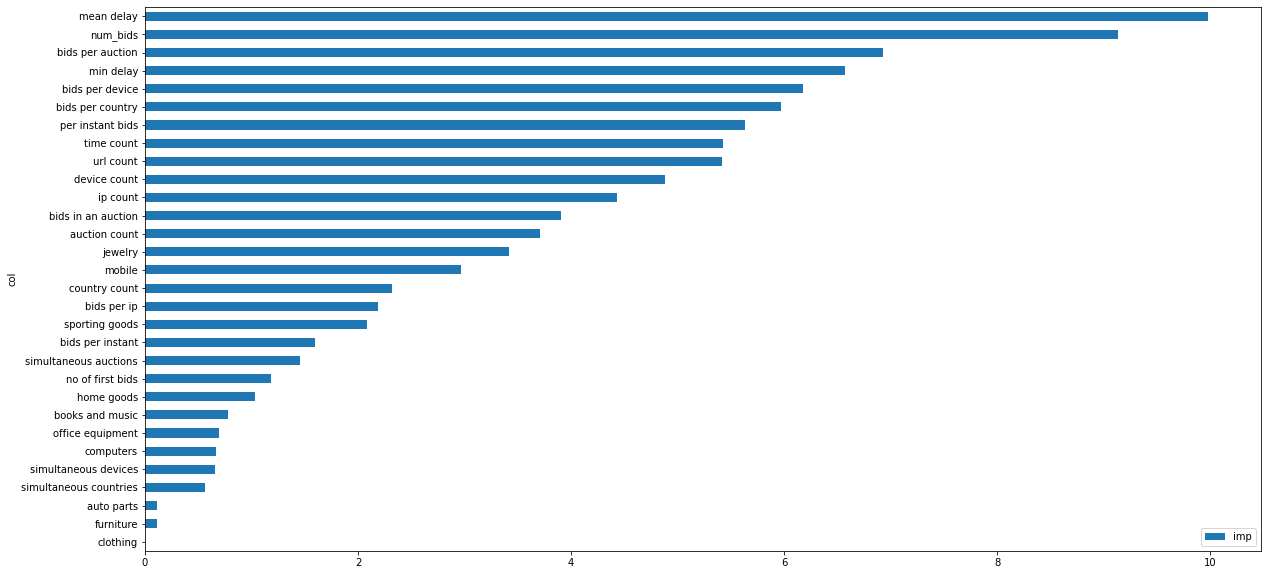

In [129]:
feature_importance(catboost_model, X_train)

### Random Forest

,imp,col
9,1.180549e-07,clothing
11,3.433483e-06,furniture
7,1.085789e-04,auto parts
15,5.829827e-03,office equipment
18,7.159501e-03,simultaneous countries
19,8.106259e-03,simultaneous devices
8,8.383249e-03,books and music
10,1.226775e-02,computers
12,1.248359e-02,home goods
13,1.268595e-02,jewelry


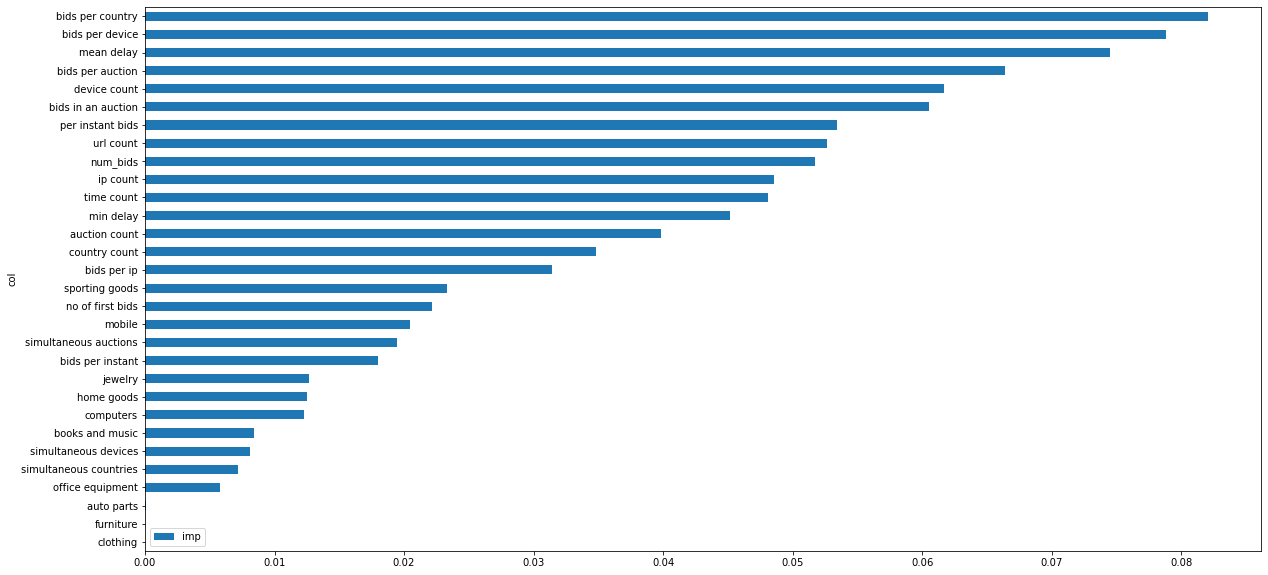

In [172]:
feature_importance(rf_model, X_train)

Mean delay ranks high from both, so I could potentially hone in on this feature and see what other information I can extract from it.